# 📈 Stock Market Analysis Project

Analyzing historical stock data for Apple (AAPL), Microsoft (MSFT), Netflix (NFLX), and Google (GOOG) to identify trends, volatility, and correlations using Python.

**Tools:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn  
**Duration:** Last 3 months  
**Data Source:** Provided CSV (stocks.csv)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

# Check if the file exists at the expected path
file_path = '../data/stocks.csv'

if os.path.exists(file_path):
    print(f"✅ File found at: {file_path}")
else:
    print(f"❌ File not found at: {file_path} — Please check your folder structure.")

✅ File found at: ../data/stocks.csv


In [5]:
# Load the dataset
data = pd.read_csv('../data/stocks.csv')

# Preview the first few rows
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [6]:
# Convert date
data['Date'] = pd.to_datetime(data['Date'])

# Sort by Ticker and Date
data = data.sort_values(by=['Ticker', 'Date'])

# Check data types and missing values
print(data.dtypes)
print(data.isnull().sum())

Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
# General info
data.info()

# Basic statistical description
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 185
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 17.4+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,2023-03-22 22:27:05.806451712,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
min,2023-02-07 00:00:00,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,2023-03-01 00:00:00,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,2023-03-22 12:00:00,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,2023-04-14 00:00:00,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,2023-05-05 00:00:00,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08
std,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07


In [8]:
print("Tickers in dataset:", data['Ticker'].unique())

Tickers in dataset: ['AAPL' 'GOOG' 'MSFT' 'NFLX']


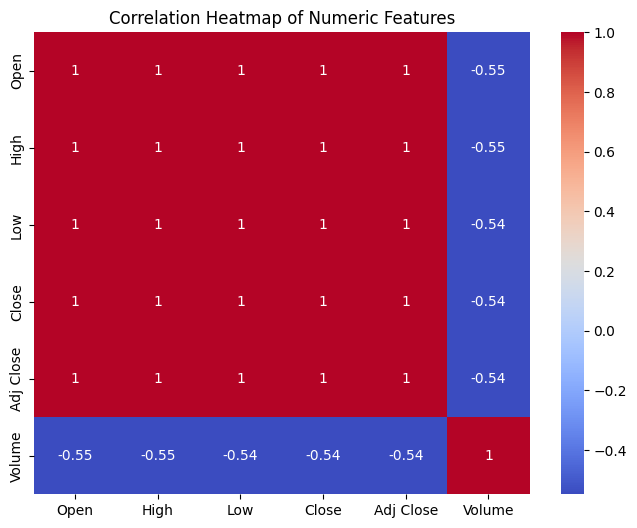

In [9]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


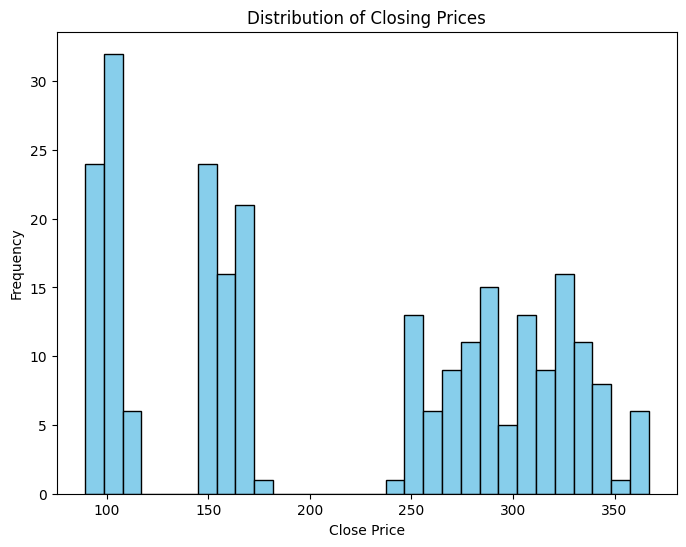

In [10]:
#closing price distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Close'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

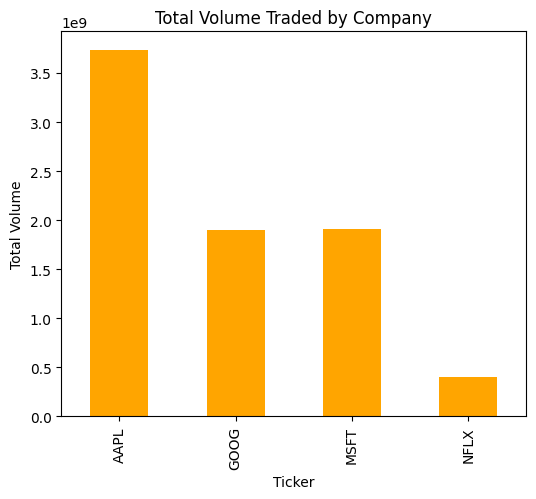

In [11]:
#volume traded by company
volume_by_company = data.groupby('Ticker')['Volume'].sum()

plt.figure(figsize=(6, 5))
volume_by_company.plot(kind='bar', color='orange')
plt.title("Total Volume Traded by Company")
plt.ylabel("Total Volume")
plt.show()

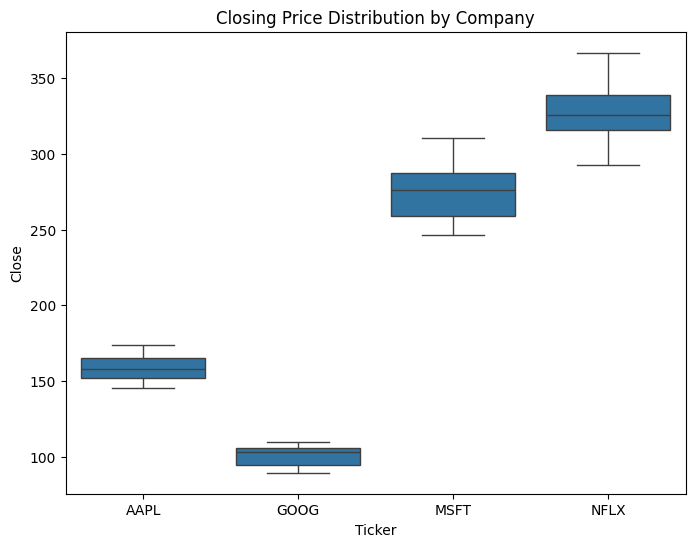

In [12]:
#bozplot of closing prices by company
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ticker', y='Close', data=data)
plt.title("Closing Price Distribution by Company")
plt.show()

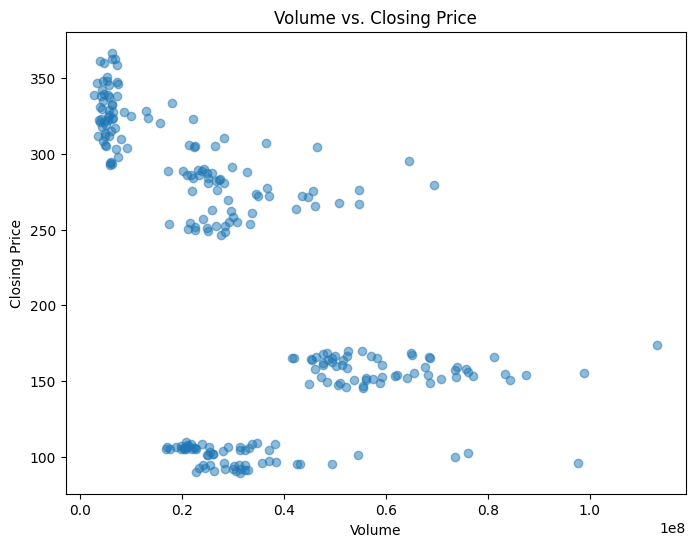

In [13]:
#volume vs. closing price
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title("Volume vs. Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.show()

In [14]:
#Average & Volatility
# 5-day moving average and volatility
data['MA_5'] = data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=5).mean())
data['Volatility_5'] = data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=5).std())

# View sample
data[['Ticker', 'Date', 'Close', 'MA_5', 'Volatility_5']].head(10)

,Ticker,Date,Close,MA_5,Volatility_5
0,AAPL,2023-02-07,154.649994,NaN,NaN
1,AAPL,2023-02-08,151.919998,NaN,NaN
2,AAPL,2023-02-09,150.869995,NaN,NaN
3,AAPL,2023-02-10,151.009995,NaN,NaN
4,AAPL,2023-02-13,153.850006,152.459998,1.706636
5,AAPL,2023-02-14,153.199997,152.169998,1.321121
6,AAPL,2023-02-15,155.330002,152.851999,1.909119
7,AAPL,2023-02-16,153.710007,153.420001,1.563141
8,AAPL,2023-02-17,152.550003,153.728003,1.030544
9,AAPL,2023-02-21,148.479996,152.654001,2.549871


📈 Plot Moving Average for One Company

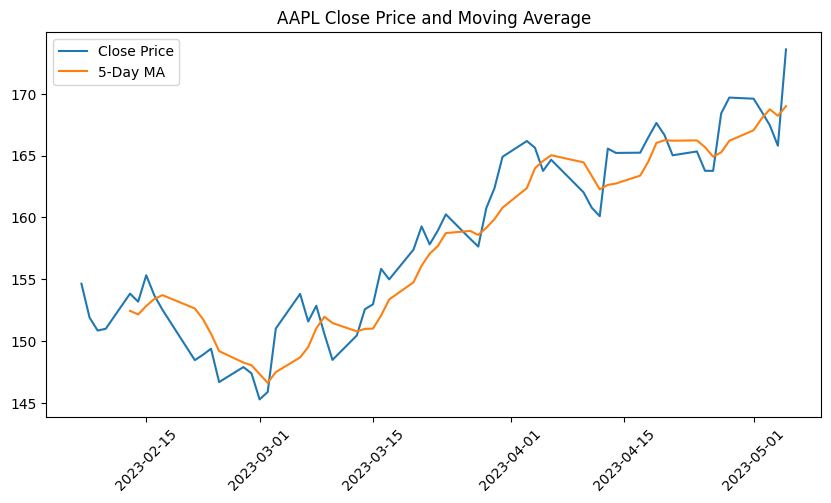

In [15]:
aapl = data[data['Ticker'] == 'AAPL']

plt.figure(figsize=(10, 5))
plt.plot(aapl['Date'], aapl['Close'], label='Close Price')
plt.plot(aapl['Date'], aapl['MA_5'], label='5-Day MA')
plt.title("AAPL Close Price and Moving Average")
plt.legend()
plt.xticks(rotation=45)
plt.show()

 Correlation Between Companies (Stock Co-Movement)

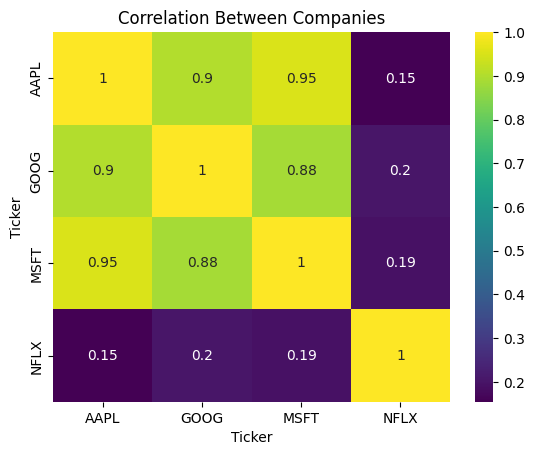

In [16]:
# Correlation of Close Prices
pivot_close = data.pivot(index='Date', columns='Ticker', values='Close')
correlation = pivot_close.corr()

sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title("Correlation Between Companies")
plt.show()

📌 Linear Regression on AAPL as an example

R2 Score: 0.8179727142061753
MSE: 13.63109837911922


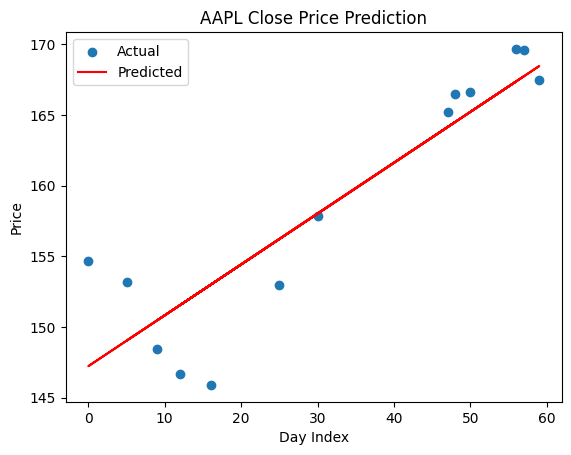

In [17]:
    from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Use index as a proxy for time
aapl = aapl.reset_index(drop=True)
aapl['Day'] = range(len(aapl))

X = aapl[['Day']]
y = aapl['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

# Plot
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.legend()
plt.title("AAPL Close Price Prediction")
plt.xlabel("Day Index")
plt.ylabel("Price")
plt.show()

### Advanced Technical Indicators on AAPL

In [18]:
aapl = data[data['Ticker'] == 'AAPL'].copy()
aapl = aapl.sort_values('Date').reset_index(drop=True)

# Confirm result
print(aapl.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL 2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL 2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL 2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL 2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume        MA_5  Volatility_5  
0  154.414230  83322600         NaN           NaN  
1  151.688400  64120100         NaN           NaN  
2  150.639999  56007100         NaN           NaN  
3  151.009995  57450700         NaN           NaN  
4  153.850006  62199000  152.459998      1.706636  


📈 A. Calculate RSI (Relative Strength Index)

In [19]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

aapl['RSI_14'] = calculate_rsi(aapl['Close'], 14)

📊 B. Calculate Bollinger Bands

In [20]:
# 20-day moving average and std deviation
ma20 = aapl['Close'].rolling(window=20).mean()
std20 = aapl['Close'].rolling(window=20).std()

aapl['Bollinger_Upper'] = ma20 + (2 * std20)
aapl['Bollinger_Lower'] = ma20 - (2 * std20)

📉 C. Plot: Bollinger Bands with Close Price

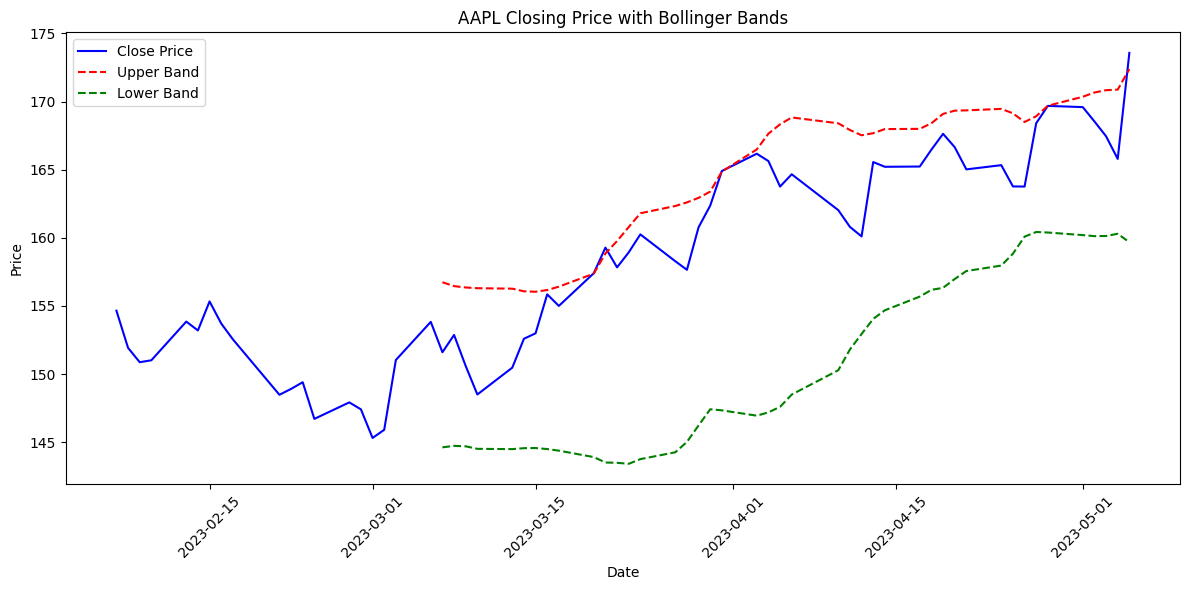

In [21]:
plt.figure(figsize=(12,6))
plt.plot(aapl['Date'], aapl['Close'], label='Close Price', color='blue')
plt.plot(aapl['Date'], aapl['Bollinger_Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(aapl['Date'], aapl['Bollinger_Lower'], label='Lower Band', color='green', linestyle='--')
plt.title("AAPL Closing Price with Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 D. Plot: RSI

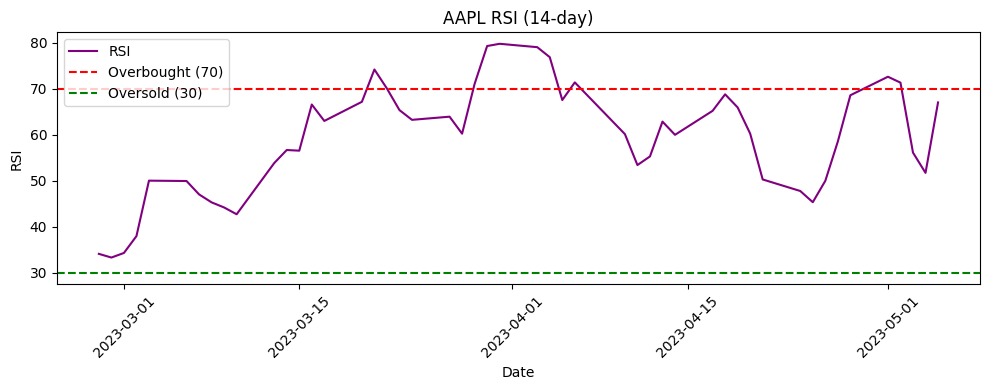

In [22]:
plt.figure(figsize=(10,4))
plt.plot(aapl['Date'], aapl['RSI_14'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("AAPL RSI (14-day)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Predicting AAPL Closing Price Using Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

R² Score: 0.9292502357412038
Mean Squared Error: 2.6869413761159904


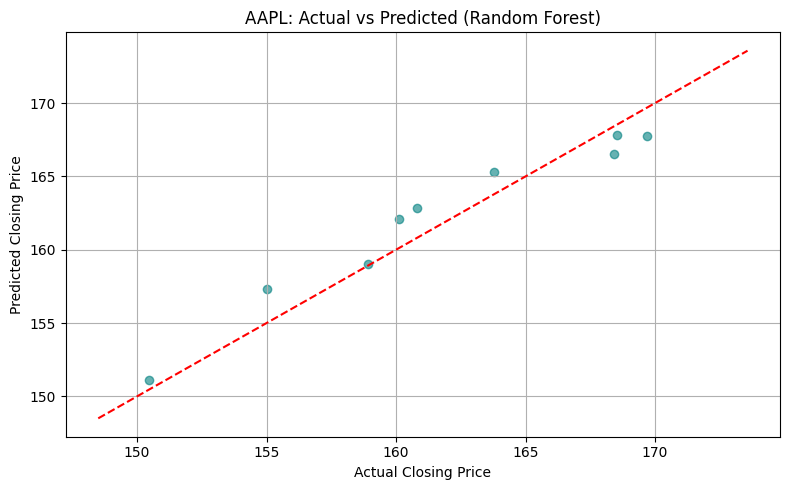

In [24]:
# Drop rows with any missing values (from indicators like MA, RSI, etc.)
aapl_model = aapl.dropna().copy()

# Select features — you can expand this list later
features = ['Open', 'High', 'Low', 'Volume']

X = aapl_model[features]
y = aapl_model['Close']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("AAPL: Actual vs Predicted (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 R² Score: 0.9362728499943066
📉 Mean Squared Error: 2.420235854156352


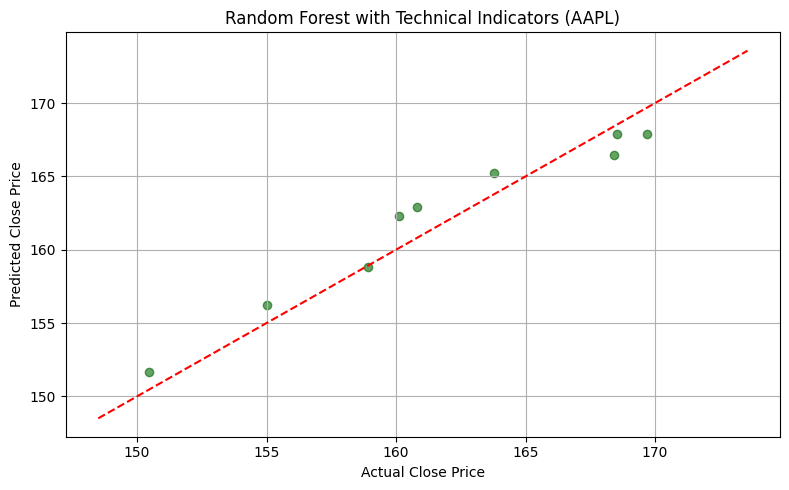

In [25]:
# Drop rows with NaN due to rolling indicators
aapl_model = aapl.dropna().copy()

# Define the new feature set
features = ['Open', 'High', 'Low', 'Volume', 'MA_5', 'Volatility_5', 'RSI_14', 'Bollinger_Upper', 'Bollinger_Lower']
X = aapl_model[features]
y = aapl_model['Close']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("🔍 R² Score:", r2_score(y_test, y_pred))
print("📉 Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkgreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Random Forest with Technical Indicators (AAPL)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.9071
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.7556
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.6223
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.5031
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.3950
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.2963
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.2065
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.1274
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0638
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.0245
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.0214
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0555
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0905
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0962
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0784
Epoch 16/20
1/1 ━━━━━━

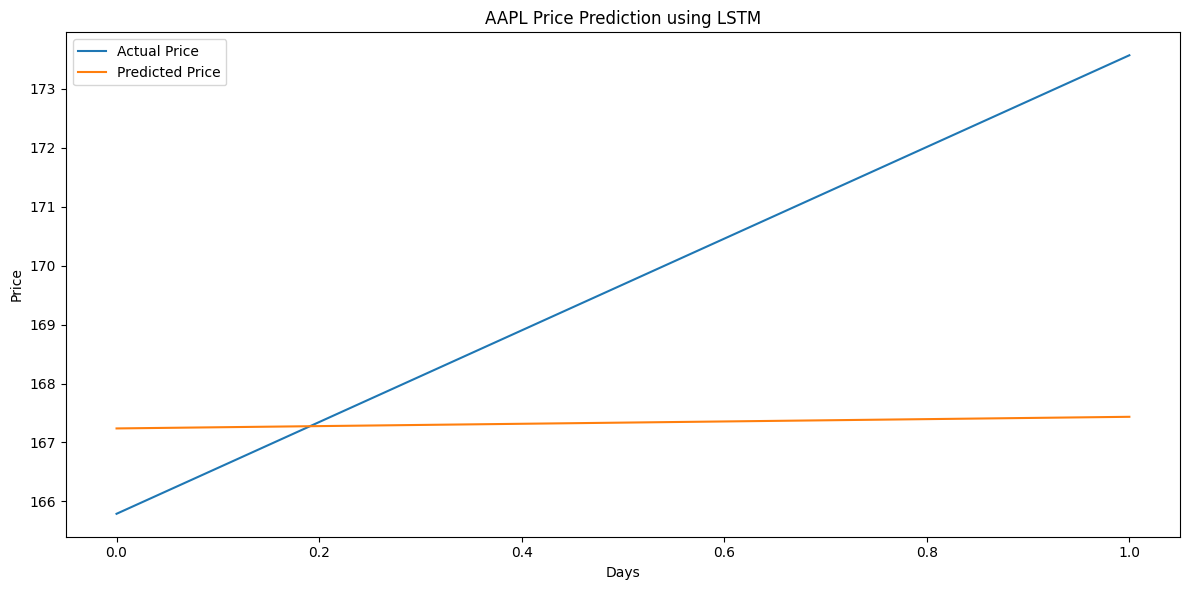

In [27]:
aapl_lstm = aapl[['Date', 'Close']].copy().dropna()
aapl_lstm = aapl_lstm.sort_values('Date').reset_index(drop=True)

# Scale the 'Close' prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl_lstm['Close'].values.reshape(-1, 1))
sequence_length = 60
X_lstm = []
y_lstm = []

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape for LSTM: (samples, timesteps, features)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_lstm, y_lstm, epochs=20, batch_size=32)
predicted_scaled = model.predict(X_lstm)
predicted_price = scaler.inverse_transform(predicted_scaled)
actual_price = scaler.inverse_transform(y_lstm.reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(actual_price, label='Actual Price')
plt.plot(predicted_price, label='Predicted Price')
plt.title("AAPL Price Prediction using LSTM")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Re-save model in the correct location and format
model.save('../outputs/aapl_lstm_model.keras')  # from inside notebooks/


In [29]:
import os

path = '../outputs/aapl_lstm_model.keras'
print("✅ File found!" if os.path.exists(path) else "❌ File NOT found.")

✅ File found!


In [30]:
from tensorflow.keras.models import load_model
model = load_model('../outputs/aapl_lstm_model.keras')

In [31]:
model = load_model(path)